In [2]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
import numpy as np 
import matplotlib.pyplot as plt

2023-01-25 22:23:53.404742: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-25 22:23:53.482083: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-25 22:23:53.482100: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-25 22:23:54.018955: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()
class_names = ["t-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

old_train_images = train_images
old_test_images = test_images

In [4]:
train_images= old_train_images.astype("float32")
test_images= old_test_images.astype("float32")

train_images/= 255.0
test_images/= 255.0

print("train_images.shape:", train_images.shape)
print("test_images.shape:", test_images.shape)

train_images.shape: (60000, 28, 28)
test_images.shape: (10000, 28, 28)


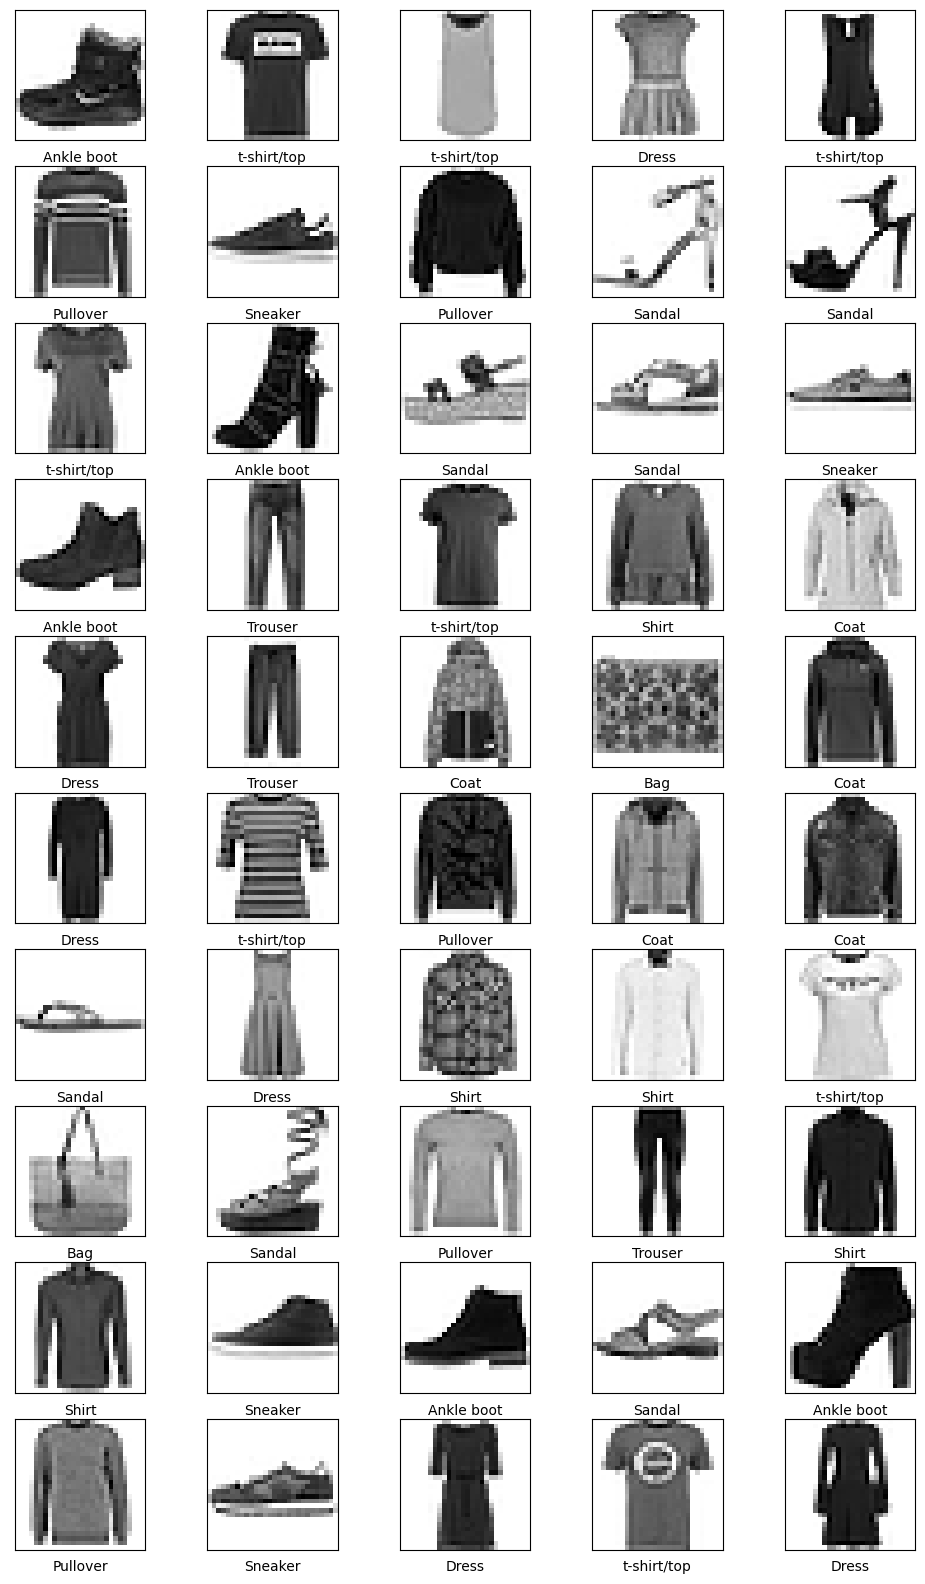

In [30]:

# Plot size
plt.figure(figsize=(12,20))
for i in range(50):

    plt.subplot(10, 5,i+1)
    # Remove axis number labels
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
# images dimensions in pixels, this skips the matrix reshaping step
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


2023-01-25 22:24:03.921132: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-25 22:24:03.921148: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-25 22:24:03.921161: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (andrespc): /proc/driver/nvidia/version does not exist
2023-01-25 22:24:03.921304: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [36]:
# sparse_categorical_crossentropy: outputs the most likely (only 1) label to be accurate
# categorcal_crossentropy: shows outputs an array of probability
# SCCE saves space but you lose a lot of information, better only use when classes_are_mutually_exclusive
# sdg gives an accuracy of 79%, by changing to adam optimizer we get a 83% accuracy
# model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [37]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 541us/step - loss: 0.6113 - accuracy: 0.8025
Epoch 2/5
1875/1875 [==============================] - 1s 554us/step - loss: 0.4838 - accuracy: 0.8374
Epoch 3/5
1875/1875 [==============================] - 1s 547us/step - loss: 0.4421 - accuracy: 0.8488
Epoch 4/5
1875/1875 [==============================] - 1s 547us/step - loss: 0.4197 - accuracy: 0.8546
Epoch 5/5
1875/1875 [==============================] - 1s 555us/step - loss: 0.4063 - accuracy: 0.8582


In [38]:
test_loss, test_acc= model.evaluate(test_images, test_labels)
print("Test accuracy: ", test_acc)

313/313 [==============================] - 0s 450us/step - loss: 0.4488 - accuracy: 0.8428
Test accuracy:  0.8428000211715698


In [10]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 376us/step


In [11]:
predictions[5]

array([2.72435378e-02, 7.79470205e-01, 1.24289319e-02, 1.00379795e-01,
       3.84729765e-02, 6.58270298e-03, 2.89422013e-02, 5.06241014e-03,
       5.66857867e-04, 8.50345241e-04], dtype=float32)

In [13]:
np.argmax(predictions[5])

1

In [14]:
test_labels[5]

1

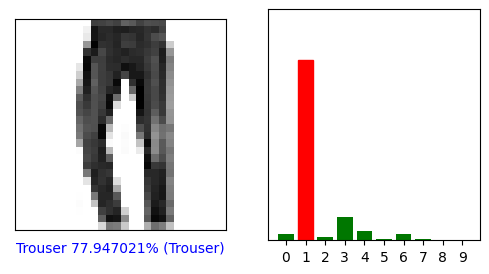

In [33]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img=predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label=np.argmax(predictions_array)
    if  predicted_label == "true_label":
        color="red"
    else:
        color="blue"
    
    plt.xlabel("{} {:2f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)

def plot_probability(i, predictions_array, true_label):
    predictions_array, true_label= predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot= plt.bar(range(10), predictions_array, color="#007700")
    plt.ylim([0,1])
    predicted_label= np.argmax(predictions_array)
    thisplot[predicted_label].set_color("red")
    thisplot[true_label]

i=5
plt.figure(figsize=(6,3))
# image plotting
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)

# bar plotting
plt.subplot(1,2,2)
plot_probability(i, predictions[i], test_labels)
plt.show()

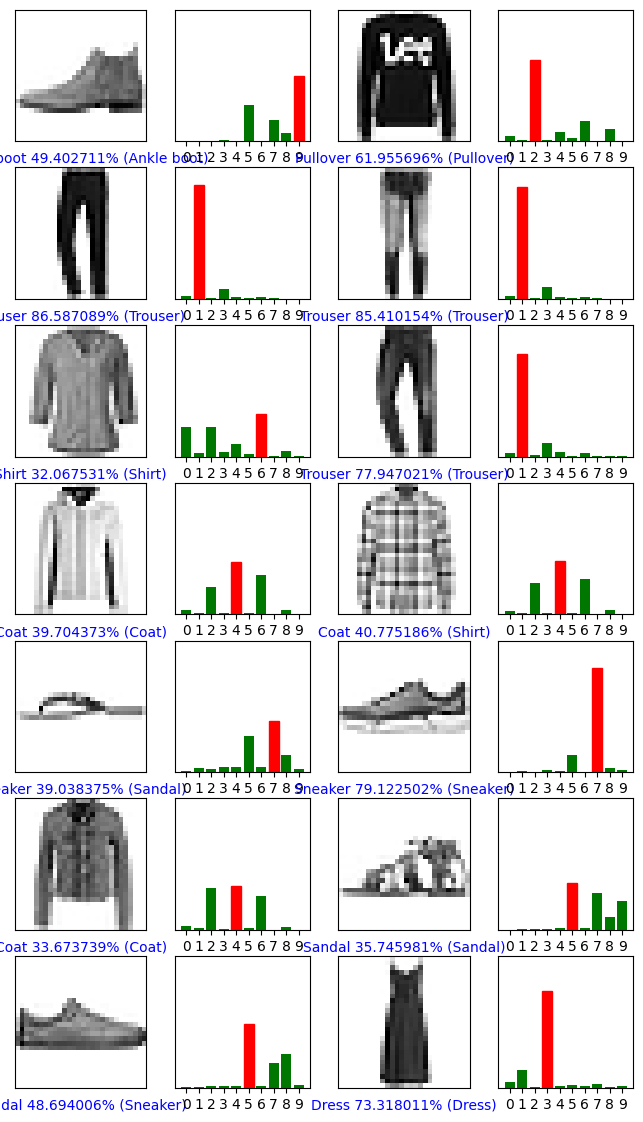

In [35]:
num_cols = 2
num_rows = 7

num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout
plt.show()